<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_RNN_Exercise_Seession_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How does PyTorch help to implement an RNN?

Let's implement an RNN using PyTorch!

### RNN with one layer configured as One-to-one

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

In this example, we have sequential data and we are going to implement an RNN with a one-to-one configuration!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SeqData_RNN.png" width="400">


In [11]:
# Define the input size, hidden size and number of outputs
input_size = 1
hidden_size = 6
output_size = 1
num_layers = 1
seq_length = 20

data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(torch.FloatTensor), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(torch.FloatTensor), requires_grad=False)

In order to create an RNN, we follow the same steps as for implementing an ANN!

1. Creating a Neural Network
2. Network Evaluation
3. Gradient Calculation
4. Back Propagation
5. Training


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn_vis.gif" width="400">



In [12]:
# 1. Creating an RNN model
rnn = torch.nn.RNN(input_size, hidden_size, bias=False)

# Initialize the output layer
fc = torch.nn.Linear(hidden_size, output_size, bias=False)


# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.3)

In [13]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 48
Name:  weight_ih_l0
shape:  torch.Size([6, 1])
Parameter containing:
tensor([[-0.2888],
        [-0.0230],
        [ 0.0774],
        [-0.0895],
        [-0.2952],
        [ 0.4078]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-3.2082e-01,  2.5052e-01, -1.2359e-01,  1.7802e-01,  8.7040e-02,
         -1.6337e-01],
        [-2.3736e-01,  3.7018e-01,  3.4390e-01, -3.2391e-02,  3.6817e-01,
         -3.4018e-01],
        [-2.9130e-01, -1.4683e-01,  6.7102e-02, -1.1024e-02, -8.6213e-02,
          1.6474e-04],
        [ 2.3286e-01,  2.3885e-01, -3.5169e-01, -3.4843e-01,  1.0673e-01,
         -2.1323e-01],
        [ 2.9536e-01,  2.4716e-01, -2.3826e-01, -2.2648e-02,  1.1460e-01,
         -3.9898e-01],
        [ 2.8494e-01, -3.8583e-01,  6.8416e-02, -2.5032e-01,  2.9895e-01,
         -1.7028e-01]], requires_grad=True)
Name:  weight
shape:  torch.Size([1, 6])
Parameter containing:
tensor([[-0.1924,  0.0106, -0.2410, 

In [14]:
epochs = 300
seq_length = 1
lr = 0.3

In [15]:
input.shape

torch.Size([1, 1, 1])

In [17]:
for i in range(epochs):
   total_loss = 0
   for j in range(x.size(0)):
      input = x[j:(j+1)]
      target = y[j:(j+1)]

      # Initialize the hidden state
      h0 = torch.zeros(1, hidden_size)

      # Forward pass
      out, hn = rnn(input, h0)

      # 2. Model Evaluation
      y_pred = fc(hn.squeeze(0))
      loss = criterion(y_pred.view(-1), target)
    
      # 3. Gradient Calculation
      optimizer.zero_grad()
      total_loss += loss
      loss.backward()

      # 4. Back Propagation
      optimizer.step()

   # display loss 
   if i % 10 == 0:
      print("Epoch: {} loss {}".format(i, total_loss.data))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 loss 5.122126579284668
Epoch: 10 loss 1.690061092376709
Epoch: 20 loss 1.6897873878479004
Epoch: 30 loss 1.6896029710769653
Epoch: 40 loss 1.6894690990447998
Epoch: 50 loss 1.6893703937530518
Epoch: 60 loss 1.6892967224121094
Epoch: 70 loss 1.6892406940460205
Epoch: 80 loss 1.6891974210739136
Epoch: 90 loss 1.689163327217102
Epoch: 100 loss 1.689135193824768
Epoch: 110 loss 1.6891121864318848
Epoch: 120 loss 1.6890926361083984
Epoch: 130 loss 1.6890755891799927
Epoch: 140 loss 1.6890602111816406
Epoch: 150 loss 1.6890463829040527
Epoch: 160 loss 1.6890336275100708
Epoch: 170 loss 1.6890217065811157
Epoch: 180 loss 1.6890103816986084
Epoch: 190 loss 1.6889996528625488
Epoch: 200 loss 1.6889891624450684
Epoch: 210 loss 1.688979148864746
Epoch: 220 loss 1.6889691352844238
Epoch: 230 loss 1.6889597177505493
Epoch: 240 loss 1.6889504194259644
Epoch: 250 loss 1.6889411211013794
Epoch: 260 loss 1.688931941986084
Epoch: 270 loss 1.6889228820800781
Epoch: 280 loss 1.6889142990112305
Ep

In [18]:
predictions = []

for i in range(x.size(0)):
   input = x[i:i+1]
   # Forward pass
   out, hn = rnn(input, h0)
   # Pass the hidden state through the output layer
   y_pred = fc(hn.squeeze(0))
   predictions.append(y_pred.data.numpy().ravel()[0])

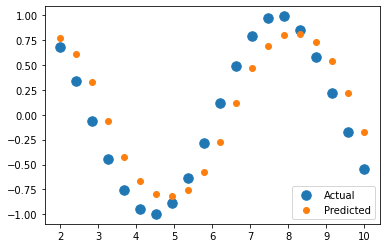

In [19]:
data_time_steps = np.linspace(2, 10, x.shape[0])

pl.scatter(data_time_steps[:], y.data.numpy(), s = 90, label = "Actual")
pl.scatter(data_time_steps[:], predictions, label = "Predicted")
pl.legend()
pl.show()

In [20]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 48
Name:  weight_ih_l0
shape:  torch.Size([6, 1])
Parameter containing:
tensor([[-0.8065],
        [ 0.1771],
        [-0.8170],
        [ 0.8130],
        [ 0.8252],
        [-0.8257]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-3.2082e-01,  2.5052e-01, -1.2359e-01,  1.7802e-01,  8.7040e-02,
         -1.6337e-01],
        [-2.3736e-01,  3.7018e-01,  3.4390e-01, -3.2391e-02,  3.6817e-01,
         -3.4018e-01],
        [-2.9130e-01, -1.4683e-01,  6.7102e-02, -1.1024e-02, -8.6213e-02,
          1.6474e-04],
        [ 2.3286e-01,  2.3885e-01, -3.5169e-01, -3.4843e-01,  1.0673e-01,
         -2.1323e-01],
        [ 2.9536e-01,  2.4716e-01, -2.3826e-01, -2.2648e-02,  1.1460e-01,
         -3.9898e-01],
        [ 2.8494e-01, -3.8583e-01,  6.8416e-02, -2.5032e-01,  2.9895e-01,
         -1.7028e-01]], requires_grad=True)
Name:  weight
shape:  torch.Size([1, 6])
Parameter containing:
tensor([[-0.1924,  0.0106, -0.2410, 

### RNN with one layer configured as Many-to-one

In [20]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

In this example, we have sequential data and we are going to implement an RNN with a Many-to-one configuration!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SeqData_RNN.png" width="400">


In [21]:
# Define the input size, hidden size and number of outputs
input_size = 2
hidden_size = 6
output_size = 1
num_layers = 1
seq_length = 20

data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(torch.FloatTensor), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(torch.FloatTensor), requires_grad=False)

In order to create an RNN, we follow the same steps as for implementing an ANN!

1. Creating a Neural Network
2. Network Evaluation
3. Gradient Calculation
4. Back Propagation
5. Training


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn_vis.gif" width="400">



In [33]:
# 1. Creating an RNN model
rnn = torch.nn.RNN(input_size, hidden_size, bias=False)

# Initialize the output layer
fc = torch.nn.Linear(hidden_size, output_size, bias=False)


# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.3)

In [34]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 54
Name:  weight_ih_l0
shape:  torch.Size([6, 2])
Parameter containing:
tensor([[-0.3842, -0.2760],
        [-0.2507,  0.3949],
        [-0.0538,  0.0928],
        [-0.0085,  0.2402],
        [-0.3527, -0.3863],
        [ 0.3510,  0.0698]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-0.3402,  0.1997, -0.2267, -0.1469, -0.0959, -0.0933],
        [-0.0663,  0.3926,  0.0180, -0.0361,  0.3734, -0.2884],
        [ 0.2821,  0.0024,  0.4007,  0.3000,  0.2085, -0.3537],
        [-0.0050,  0.3329, -0.3460, -0.0841,  0.1212, -0.2376],
        [-0.0543, -0.1468,  0.0025, -0.4041, -0.3034, -0.0545],
        [ 0.2107,  0.1552,  0.1369,  0.1960, -0.3657, -0.2092]],
       requires_grad=True)
Name:  weight
shape:  torch.Size([1, 6])
Parameter containing:
tensor([[ 0.3965,  0.0039, -0.3568,  0.2759, -0.0582, -0.2657]],
       requires_grad=True)


In [35]:
epochs = 300
seq_length = 1
lr = 0.1

In [36]:
input.size(-1)

1

In [37]:
for i in range(epochs):
   total_loss = 0
   for j in range(x.size(0) - 1):
      input = x[j:(j+2)]
      target = y[j:(j+2)]

      # Initialize the hidden state
      h0 = torch.zeros(1,  hidden_size)

      # Forward pass
      out, hn = rnn(input.t(), h0)

      # 2. Model Evaluation
      y_pred = fc(hn.squeeze(0))
      loss = criterion(y_pred.view(-1), target)
    
      # 3. Gradient Calculation
      optimizer.zero_grad()
      total_loss += loss
      loss.backward()

      # 4. Back Propagation
      optimizer.step()

   # display loss 
   if i % 10 == 0:
      print("Epoch: {} loss {}".format(i, total_loss.data))

Epoch: 0 loss 3.3762500286102295
Epoch: 10 loss 0.49671491980552673
Epoch: 20 loss 0.45070821046829224
Epoch: 30 loss 0.4477382302284241
Epoch: 40 loss 0.4472932517528534
Epoch: 50 loss 0.4470817446708679
Epoch: 60 loss 0.4469199776649475
Epoch: 70 loss 0.44677793979644775
Epoch: 80 loss 0.4466451108455658
Epoch: 90 loss 0.44651612639427185
Epoch: 100 loss 0.4463876187801361
Epoch: 110 loss 0.4462575614452362
Epoch: 120 loss 0.4461246728897095
Epoch: 130 loss 0.4459878206253052
Epoch: 140 loss 0.44584646821022034
Epoch: 150 loss 0.4456998109817505
Epoch: 160 loss 0.44554758071899414
Epoch: 170 loss 0.4453893303871155
Epoch: 180 loss 0.4452248513698578
Epoch: 190 loss 0.44505372643470764
Epoch: 200 loss 0.4448758363723755
Epoch: 210 loss 0.444691002368927
Epoch: 220 loss 0.44449904561042786
Epoch: 230 loss 0.4442996382713318
Epoch: 240 loss 0.44409292936325073
Epoch: 250 loss 0.4438786208629608
Epoch: 260 loss 0.4436568319797516
Epoch: 270 loss 0.44342750310897827
Epoch: 280 loss 0.4431

In [43]:
predictions = []

for i in range(x.size(0) - 1):
   input = x[i:i+2]
   # Forward pass
   out, hn = rnn(input.t(), h0)
   # Pass the hidden state through the output layer
   y_pred = fc(hn.squeeze(0))
   predictions.append(y_pred.data.numpy().ravel()[0])

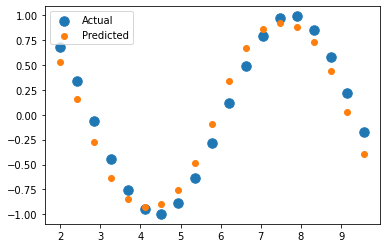

In [41]:
data_time_steps = np.linspace(2, 10, x.shape[0])

pl.scatter(data_time_steps[:-1], y.data[:-1].numpy(), s = 90, label = "Actual")
pl.scatter(data_time_steps[:-1], predictions, label = "Predicted")
pl.legend()
pl.show()

In [44]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 54
Name:  weight_ih_l0
shape:  torch.Size([6, 2])
Parameter containing:
tensor([[-1.0623,  1.6469],
        [-0.2183,  0.4557],
        [ 0.0235, -0.9632],
        [-0.2005,  1.0576],
        [-0.5270, -0.6371],
        [ 0.4598, -1.2108]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-0.3402,  0.1997, -0.2267, -0.1469, -0.0959, -0.0933],
        [-0.0663,  0.3926,  0.0180, -0.0361,  0.3734, -0.2884],
        [ 0.2821,  0.0024,  0.4007,  0.3000,  0.2085, -0.3537],
        [-0.0050,  0.3329, -0.3460, -0.0841,  0.1212, -0.2376],
        [-0.0543, -0.1468,  0.0025, -0.4041, -0.3034, -0.0545],
        [ 0.2107,  0.1552,  0.1369,  0.1960, -0.3657, -0.2092]],
       requires_grad=True)
Name:  weight
shape:  torch.Size([1, 6])
Parameter containing:
tensor([[ 0.3965,  0.0039, -0.3568,  0.2759, -0.0582, -0.2657]],
       requires_grad=True)


## RNN with two layers configured as One-to-one

In this example, we have sequential data and we are going to implement an RNN with 2 layers and a One-to-one configuration!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SeqData_RNN.png" width="400">


Let's use non-linear data with more complexity in this step!

In [45]:
# Define the input size, hidden size and number of outputs
input_size = 1
hidden_size = 6
output_size = 1
num_layers = 2
seq_length = 20

data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(torch.FloatTensor), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(torch.FloatTensor), requires_grad=False)

In order to create an RNN, we follow the same steps as for implementing an ANN!

1. Creating a Neural Network
2. Network Evaluation
3. Gradient Calculation
4. Back Propagation
5. Training


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn_vis.gif" width="400">



In [52]:
# 1. Creating a RNN model
rnn = torch.nn.RNN(input_size, hidden_size, bias=False, nonlinearity='tanh', num_layers=2)

# Initialize the output layer
fc = torch.nn.Linear(hidden_size, output_size, bias=False)


# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.01)

In [53]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 120
Name:  weight_ih_l0
shape:  torch.Size([6, 1])
Parameter containing:
tensor([[-0.2962],
        [-0.0924],
        [-0.1140],
        [ 0.1116],
        [-0.1332],
        [-0.3197]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[ 0.0702, -0.3971, -0.1220,  0.3464, -0.4012, -0.1342],
        [-0.0741, -0.2294, -0.2343,  0.2221,  0.1027,  0.0859],
        [-0.1500,  0.2303, -0.1509, -0.1526,  0.1217,  0.1330],
        [-0.2623, -0.1567, -0.3532, -0.1206,  0.1613, -0.2738],
        [ 0.3611,  0.1287,  0.1213,  0.3848,  0.1694,  0.0507],
        [-0.2864, -0.1079,  0.2135,  0.3350,  0.3289, -0.0052]],
       requires_grad=True)
Name:  weight_ih_l1
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[-0.2557, -0.1266, -0.0105, -0.0474, -0.3792,  0.0272],
        [-0.1698, -0.3576,  0.3857,  0.3411,  0.1472, -0.0063],
        [-0.0951,  0.1553, -0.0015, -0.3038,  0.2031,  0.0342],
        [ 0.3653, -0.3807, -

In [48]:
epochs = 1000
lr = 0.1

In [49]:
x.size(0)

20

In [54]:
for i in range(epochs):
   total_loss = 0
   for j in range(x.size(0)-3):
      input = x[j:(j+1)]
      target = y[j:(j+1)]

      # Initialize the hidden state
      h0 = torch.zeros(2, hidden_size)

      # Forward pass
      out, hn = rnn(input, h0)

      # 2. Model Evaluation
      y_pred = fc(hn.squeeze(0))
      loss = criterion(y_pred.view(-1), target)
    
      # 3. Gradient Calculation
      optimizer.zero_grad()
      total_loss += loss
      loss.backward()

      # 4. Back Propagation
      optimizer.step()

   # display loss 
   if i % 10 == 0:
      print("Epoch: {} loss {}".format(i, total_loss.data))

Epoch: 0 loss 8.37125301361084
Epoch: 10 loss 6.3956685066223145
Epoch: 20 loss 4.73377799987793
Epoch: 30 loss 3.4398276805877686
Epoch: 40 loss 2.59870982170105
Epoch: 50 loss 2.109647274017334
Epoch: 60 loss 1.8306785821914673
Epoch: 70 loss 1.667047142982483
Epoch: 80 loss 1.5670651197433472
Epoch: 90 loss 1.503443717956543
Epoch: 100 loss 1.4614301919937134
Epoch: 110 loss 1.4327354431152344
Epoch: 120 loss 1.412517786026001
Epoch: 130 loss 1.3978482484817505
Epoch: 140 loss 1.386900544166565
Epoch: 150 loss 1.3785068988800049
Epoch: 160 loss 1.3719035387039185
Epoch: 170 loss 1.3665800094604492
Epoch: 180 loss 1.3621913194656372
Epoch: 190 loss 1.3584990501403809
Epoch: 200 loss 1.3553358316421509
Epoch: 210 loss 1.3525831699371338
Epoch: 220 loss 1.3501561880111694
Epoch: 230 loss 1.3479923009872437
Epoch: 240 loss 1.3460447788238525
Epoch: 250 loss 1.344278335571289
Epoch: 260 loss 1.342665672302246
Epoch: 270 loss 1.3411855697631836
Epoch: 280 loss 1.339821219444275
Epoch: 290

In [55]:
predictions = []

for i in range(x.size(0)):
   input = x[i:i+1]

   # Forward pass
   out, hn = rnn(input, h0)
   # Pass the hidden state through the output layer
   y_pred = fc(hn.squeeze(0))
   predictions.append(y_pred.data.numpy().ravel()[0])

In [125]:
len(predictions)

20

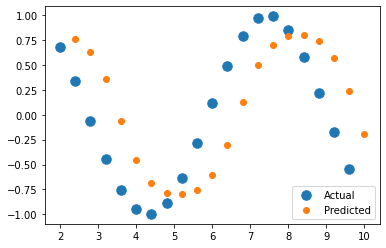

In [56]:
pl.scatter(data_time_steps[:-1], y.data[:].numpy().tolist(), s = 90, label = "Actual")
pl.scatter(data_time_steps[1:], predictions, label = "Predicted")
pl.legend()
pl.show()

In [57]:
# Combine the parameters of the LSTM layer and linear layer
params = list(rnn.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

for name, param in rnn.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)
# Print the shapes of the parameters
for name, param in fc.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print(param)

Number of parameters: 120
Name:  weight_ih_l0
shape:  torch.Size([6, 1])
Parameter containing:
tensor([[-0.9744],
        [-0.0609],
        [-0.8666],
        [ 1.0766],
        [-1.2802],
        [ 1.0829]], requires_grad=True)
Name:  weight_hh_l0
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[ 0.0702, -0.3971, -0.1220,  0.3464, -0.4012, -0.1342],
        [-0.0741, -0.2294, -0.2343,  0.2221,  0.1027,  0.0859],
        [-0.1500,  0.2303, -0.1509, -0.1526,  0.1217,  0.1330],
        [-0.2623, -0.1567, -0.3532, -0.1206,  0.1613, -0.2738],
        [ 0.3611,  0.1287,  0.1213,  0.3848,  0.1694,  0.0507],
        [-0.2864, -0.1079,  0.2135,  0.3350,  0.3289, -0.0052]],
       requires_grad=True)
Name:  weight_ih_l1
shape:  torch.Size([6, 6])
Parameter containing:
tensor([[ 0.0989, -0.0411,  0.2407, -0.3282,  0.0240, -0.1828],
        [-0.2841, -0.3840,  0.3032,  0.4334,  0.0172,  0.0645],
        [ 0.1103,  0.2124,  0.1280, -0.4453,  0.4320, -0.0399],
        [ 0.0957, -0.4609, -